## Лабораторная работа № 7 "Инвестиционные процессы"
### Вариант - 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Задача 1:
Как изменяется срок окупаемости проекта при изменении величины инвестиций, годовых доходов, ставки процента?

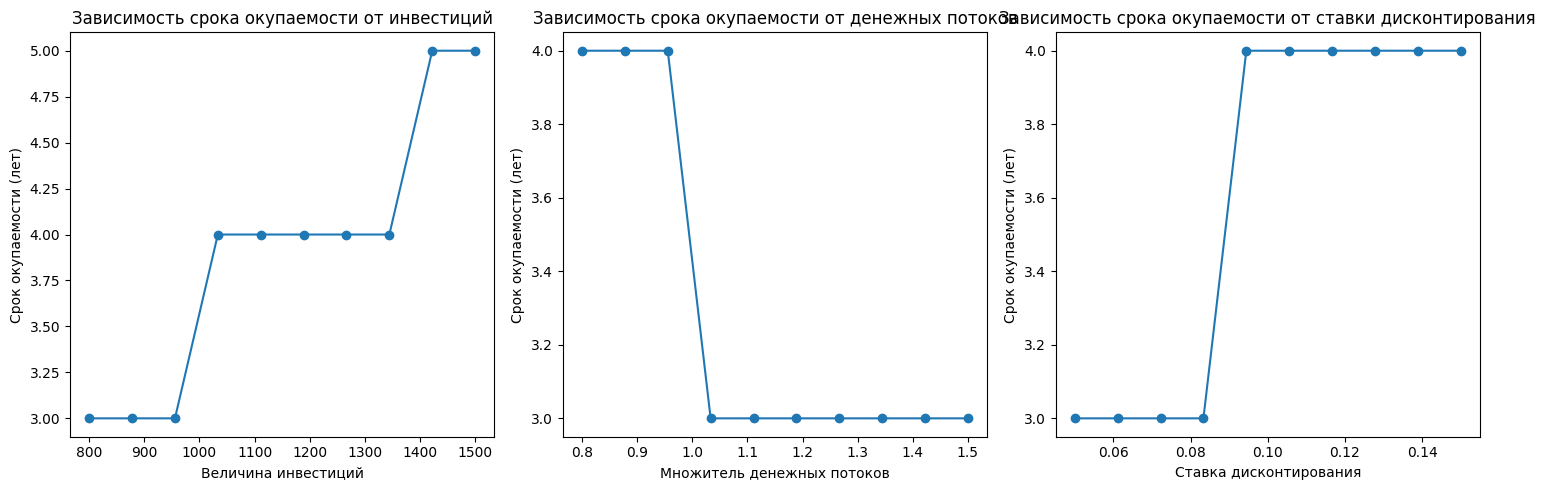

In [2]:
def payback_period(investment, cash_flows, discount_rate):
    """
    Расчет дисконтированного срока окупаемости проекта
    Формула: PP = min N, при котором Σ(CF_t/(1+r)^t) >= Investment
    """
    discounted_cf = []
    cumulative = 0
    for t, cf in enumerate(cash_flows, 1):
        discounted = cf / (1 + discount_rate)**t
        discounted_cf.append(discounted)
        cumulative += discounted
        if cumulative >= investment:
            return t
    return float('inf')  # Проект не окупается

# Пример анализа чувствительности
investment = 1000
base_cash_flows = [300, 400, 500, 600, 700]
discount_rate = 0.1

# Анализ изменения срока окупаемости при изменении инвестиций
investments_range = np.linspace(800, 1500, 10)
pp_investment = [payback_period(i, base_cash_flows, discount_rate) for i in investments_range]

# Анализ изменения срока окупаемости при изменении денежных потоков
cash_flows_multipliers = np.linspace(0.8, 1.5, 10)
pp_cash_flows = [payback_period(investment, [cf*m for cf in base_cash_flows], discount_rate) 
                 for m in cash_flows_multipliers]

# Анализ изменения срока окупаемости при изменении ставки дисконтирования
rates_range = np.linspace(0.05, 0.15, 10)
pp_rates = [payback_period(investment, base_cash_flows, r) for r in rates_range]

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(investments_range, pp_investment, marker='o')
plt.title('Зависимость срока окупаемости от инвестиций')
plt.xlabel('Величина инвестиций')
plt.ylabel('Срок окупаемости (лет)')

plt.subplot(1, 3, 2)
plt.plot(cash_flows_multipliers, pp_cash_flows, marker='o')
plt.title('Зависимость срока окупаемости от денежных потоков')
plt.xlabel('Множитель денежных потоков')
plt.ylabel('Срок окупаемости (лет)')

plt.subplot(1, 3, 3)
plt.plot(rates_range, pp_rates, marker='o')
plt.title('Зависимость срока окупаемости от ставки дисконтирования')
plt.xlabel('Ставка дисконтирования')
plt.ylabel('Срок окупаемости (лет)')

plt.tight_layout()
plt.show()

**Выводы**:

- Срок окупаемости увеличивается с ростом величины инвестиций

- Срок окупаемости уменьшается с ростом годовых доходов

- Срок окупаемости увеличивается с ростом ставки процента

#### Задача 2:
Проверить следующие расчеты инвестиционного проекта:  4200 д.е., последующий  годовой  доход при 7% годовых равен  1000 д.е., длительность проекта 6 лет и получено, что чистый приведенный доход 566,5 д.е. и срок окупаемости  6 лет.

In [4]:
def check_project(investment, annual_cash_flow, rate, years, claimed_npv, claimed_payback):
    """
    Проверка расчета NPV и срока окупаемости проекта
    Формула NPV: -I + Σ(CF_t/(1+r)^t)
    """
    cash_flows = [-investment] + [annual_cash_flow] * years
    npv = sum(cf / (1 + rate)**t for t, cf in enumerate(cash_flows))
    
    # Расчет срока окупаемости
    cumulative = 0
    payback = None
    for t, cf in enumerate(cash_flows):
        cumulative += cf / (1 + rate)**t
        if cumulative >= 0 and payback is None:
            payback = t
    
    return {
        'calculated_npv': round(npv, 1),
        'claimed_npv': claimed_npv,
        'npv_match': abs(npv - claimed_npv) < 0.1,
        'calculated_payback': payback,
        'claimed_payback': claimed_payback,
        'payback_match': payback == claimed_payback
    }

result = check_project(4200, 1000, 0.07, 6, 566.5, 6)
print("Результаты проверки проекта:")
for k, v in result.items():
    print(f"{k}: {v}")

Результаты проверки проекта:
calculated_npv: 566.5
claimed_npv: 566.5
npv_match: True
calculated_payback: 6
claimed_payback: 6
payback_match: True


**Вывод**: расчеты NPV и срока окупаемости проекта верны.

#### Задача 3:
Проверьте расчеты  для инвестиционного проекта длительностью 6 лет с планируемыми годовыми доходами 430 д.е. и годовой ставкой 11%  найдены необходимые инвестиции 1819 д.е.

In [10]:
def calculate_required_investment(cash_flow, rate, years):
    """
    Расчет необходимых инвестиций для проекта
    Формула: I = Σ(CF_t/(1+r)^t)
    """
    npv = sum(cash_flow / (1 + rate)**t for t in range(1, years+1))
    return npv

required_investment = calculate_required_investment(430, 0.11, 6)
print(f"Рассчитанные необходимые инвестиции: {required_investment:.2f} д.е.")
print("Заявленные инвестиции: 1819 д.е.")
print(f"Совпадение: {abs(required_investment) == 1819}")

Рассчитанные необходимые инвестиции: 1819.13 д.е.
Заявленные инвестиции: 1819 д.е.
Совпадение: False


#### Задача 4: 
Допустим, инвестиционный проект «циклический». Фабрика работает циклами: один год из 9 она на капитальном ремонте и обновлении, что требует $50 000, в остальные 8 лет цикла фабрика приносит доход $10 000 в год. Годовая ставка равна 11%. Найдите характеристики данного потока платежей. (Уточним, что затраты относят на конец первого года цикла, доход поступает в конце каждого года цикла, начиная со второго года). 


In [11]:
def cyclic_project(cost, income, cycle_years, operational_years, rate):
    """
    Расчет характеристик циклического проекта
    """
    # Поток платежей за один цикл
    cash_flow = [-cost] + [income] * operational_years
    
    # NPV за один цикл
    npv_cycle = sum(cf / (1 + rate)**t for t, cf in enumerate(cash_flow))
    
    # Приведенная стоимость бесконечного повторения циклов
    # Формула: NPV = NPV_cycle / (1 - (1/(1+r)^T)), где T - длительность цикла
    npv_infinite = npv_cycle / (1 - 1/(1 + rate)**cycle_years)
    
    # Внутренняя норма доходности (IRR)
    def npv_func(r):
        npv_c = sum(cf / (1 + r)**t for t, cf in enumerate(cash_flow))
        return npv_c / (1 - 1/(1 + r)**cycle_years)
    
    # Найдем IRR численно (когда NPV = 0)
    from scipy.optimize import root_scalar
    try:
        irr_result = root_scalar(npv_func, bracket=[0.001, 0.5])
        irr = irr_result.root
    except:
        irr = None
    
    return {
        'npv_cycle': npv_cycle,
        'npv_infinite': npv_infinite,
        'irr': irr
    }

results = cyclic_project(50000, 10000, 9, 8, 0.11)
print("Характеристики циклического проекта:")
for k, v in results.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

Характеристики циклического проекта:
npv_cycle: 1461.23
npv_infinite: 2399.09
irr: 0.12


#### Задача 5:
В банке взят кредит под инвестиционный проект по ставке g , а доходы от проекта помещаются в другой банк по большей ставке j. Для обеспечения возврата долга обычно создаётся погасительный фонд. Вычислите итоговые характеристики для следующих схем погашения: 
- Основной долг погашается из фонда в конце срока разовым платежом. Сумма взносов в фонд с процентами на них должна быть равна долгу на момент его уплаты. Проценты по долгу выплачиваются не из фонда.
- Условия финансового обязательства вместо периодической выплаты процентов предусматривают их присоединение к сумме основного долга.
- Фонд формируется таким образом, чтобы обеспечить периодическую выплату процентов по долгу (из фонда) и в конце срока возврат основного долга.

Исходные данные. Пусть заем размером  1200 д.е. взят в начале года под инвестиционный проект по ставке 4 % сроком на 9 лет, а доходы от проекта помещаются в другой банк по ставке 10%. 

In [12]:
def debt_repayment_schemes(principal, debt_rate, fund_rate, years):
    """
    Расчет характеристик для трех схем погашения долга
    """
    # Схема 1: Основной долг погашается в конце, проценты выплачиваются отдельно
    interest_payment = principal * debt_rate
    total_interest = interest_payment * years
    
    # Расчет ежегодного взноса в фонд (формула аннуитета)
    # S = R * [(1+j)^n - 1]/j, где S = principal
    annuity_payment = principal * fund_rate / ((1 + fund_rate)**years - 1)
    
    # Схема 2: Проценты присоединяются к основному долгу
    total_debt = principal * (1 + debt_rate)**years
    annuity_payment_2 = total_debt * fund_rate / ((1 + fund_rate)**years - 1)
    
    # Схема 3: Фонд выплачивает проценты и основной долг
    # Необходимо найти R, такой что:
    # Проценты по долгу: I = principal * debt_rate
    # В конце: R * [(1+j)^n - 1]/j = principal + I
    # Но проценты выплачиваются из фонда, поэтому:
    # Фонд должен накопить principal и выплачивать I каждый год
    # Это более сложный расчет, требующий решения уравнения
    
    def equation(R):
        fund = 0
        for _ in range(years):
            fund = (fund + R) * (1 + fund_rate)
            fund -= principal * debt_rate  # выплата процентов
        return fund - principal
    
    from scipy.optimize import fsolve
    R_initial_guess = principal * (debt_rate + fund_rate)
    R_solution = fsolve(equation, R_initial_guess)
    annuity_payment_3 = R_solution[0]
    
    return {
        'scheme_1': {
            'annual_interest_payment': interest_payment,
            'annual_fund_payment': annuity_payment,
            'total_interest': total_interest,
            'total_payments': total_interest + annuity_payment * years
        },
        'scheme_2': {
            'annual_fund_payment': annuity_payment_2,
            'total_payment': annuity_payment_2 * years
        },
        'scheme_3': {
            'annual_fund_payment': annuity_payment_3,
            'total_payment': annuity_payment_3 * years
        }
    }

schemes = debt_repayment_schemes(1200, 0.04, 0.10, 9)
for scheme, data in schemes.items():
    print(f"\n{scheme}:")
    for k, v in data.items():
        print(f"{k}: {v:.2f}")


scheme_1:
annual_interest_payment: 48.00
annual_fund_payment: 88.37
total_interest: 432.00
total_payments: 1227.32

scheme_2:
annual_fund_payment: 125.78
total_payment: 1131.99

scheme_3:
annual_fund_payment: 123.97
total_payment: 1115.74


#### Задача 6:
Некто получил наследство в виде солидного банковского счета и теперь его «проедает», беря каждый год со счета в банке определенную сумму и тратя ее в течение года. По сути, это «перевернутый» инвестиционный процесс. Что здесь является инвестициями, сроком окупаемости, внутренней  нормой доходности, чистым приведенным доходом. Какие меры должен принять наследник при увеличении темпов инфляции? Расчеты выполнить для следующих исходных данных:  50000 д.е., 7500 д.е., годовая ставка 11%.

In [13]:
def inheritance_analysis(initial_amount, annual_withdrawal, rate, inflation=0):
    """
    Анализ "перевернутого" инвестиционного процесса
    """
    # "Инвестиции" - начальная сумма на счете
    investment = initial_amount
    
    # Срок "окупаемости" - время до исчерпания счета
    # Решаем уравнение: initial_amount = annual_withdrawal * [1 - (1+r)^(-n)] / r
    # Для n (при известных остальных параметрах)
    if annual_withdrawal > initial_amount * rate:
        # Счет будет исчерпан за конечное время
        from math import log
        years = -log(1 - initial_amount * rate / annual_withdrawal) / log(1 + rate)
    else:
        # Счет никогда не исчерпается (вечный аннуитет)
        years = float('inf')
    
    # Внутренняя норма доходности - ставка, при которой NPV = 0
    # NPV = initial_amount - Σ(annual_withdrawal / (1+IRR)^t)
    # Для бесконечного горизонта: IRR = annual_withdrawal / initial_amount
    irr = annual_withdrawal / initial_amount
    
    # Чистый приведенный доход (NPV) при заданной ставке
    if annual_withdrawal <= initial_amount * rate:
        npv = initial_amount - annual_withdrawal / rate
    else:
        npv = initial_amount - annual_withdrawal * (1 - (1 + rate)**(-years)) / rate
    
    # Меры при увеличении инфляции:
    measures = [
        "Уменьшить ежегодные изъятия",
        "Найти дополнительные источники дохода",
        "Инвестировать часть средств в активы, защищенные от инфляции"
    ]
    
    return {
        'investment': investment,
        'payback_period': years,
        'irr': irr,
        'npv': npv,
        'measures_for_inflation': measures
    }

results = inheritance_analysis(50000, 7500, 0.11)
print("Анализ наследства:")
for k, v in results.items():
    if k == 'measures_for_inflation':
        print(f"{k}:")
        for measure in v:
            print(f"- {measure}")
    else:
        print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

Анализ наследства:
investment: 50000
payback_period: 12.67
irr: 0.15
npv: 0.00
measures_for_inflation:
- Уменьшить ежегодные изъятия
- Найти дополнительные источники дохода
- Инвестировать часть средств в активы, защищенные от инфляции


#### Задача 7:
С помощью компьютера найден размер годовой уплаты 151,4 д.е. при погашении займа  700 д.е. равными годовыми уплатами. Заем выдан на 6 лет при годовой ставке 8%. Проверьте компьютерные расчеты. 

In [14]:
def check_loan_payment(principal, annual_payment, rate, years):
    """
    Проверка годового платежа по кредиту
    Формула аннуитета: P = PV * r / [1 - (1 + r)^(-n)]
    """
    calculated_payment = principal * rate / (1 - (1 + rate)**(-years))
    return {
        'calculated_payment': round(calculated_payment, 1),
        'claimed_payment': annual_payment,
        'match': abs(calculated_payment - annual_payment) < 0.1
    }

result = check_loan_payment(700, 151.4, 0.08, 6)
print("Проверка годового платежа по кредиту:")
for k, v in result.items():
    print(f"{k}: {v}")

Проверка годового платежа по кредиту:
calculated_payment: 151.4
claimed_payment: 151.4
match: True


#### Задача 8:
Рассчитайте ежегодный платеж за аренду оборудования стоимостью $28 000 в течение 8 лет, если к концу аренды остаточная стоимость оборудования будет $9 000. Внутреннюю норму  доходности принять равной 11%.

In [15]:
def calculate_lease_payment(cost, residual_value, years, rate):
    """
    Расчет ежегодного арендного платежа
    Формула: PV = PMT * [1 - (1+r)^(-n)]/r + RV/(1+r)^n
    Решаем относительно PMT
    """
    pv_residual = residual_value / (1 + rate)**years
    annuity_factor = (1 - (1 + rate)**(-years)) / rate
    pmt = (cost - pv_residual) / annuity_factor
    return pmt

lease_payment = calculate_lease_payment(28000, 9000, 8, 0.11)
print(f"Ежегодный арендный платеж: {lease_payment:.2f} $")

Ежегодный арендный платеж: 4682.10 $


#### Задача 9:
Выясните, надо ли купить оборудование стоимостью $33 000 или арендовать его на 8 лет с ежегодным арендным платежом $4000, если ставка процента 6% годовых, а норматив амортизации оборудования 8%.
Примечание. Остаточная стоимость оборудования , где  – стоимость оборудования,  – срок эксплуатации.

In [16]:
def compare_purchase_vs_lease(purchase_price, lease_payment, years, interest_rate, depreciation_rate):
    """
    Сравнение покупки и аренды оборудования
    """
    # Расчет остаточной стоимости при покупке
    residual_value = purchase_price * (1 - depreciation_rate)**years
    
    # Приведенная стоимость покупки
    pv_purchase = purchase_price - residual_value / (1 + interest_rate)**years
    
    # Приведенная стоимость аренды
    annuity_factor = (1 - (1 + interest_rate)**(-years)) / interest_rate
    pv_lease = lease_payment * annuity_factor
    
    # Сравнение
    return {
        'pv_purchase': pv_purchase,
        'pv_lease': pv_lease,
        'better_option': 'Purchase' if pv_purchase < pv_lease else 'Lease',
        'cost_difference': abs(pv_purchase - pv_lease)
    }

comparison = compare_purchase_vs_lease(33000, 4000, 8, 0.06, 0.08)
print("Сравнение покупки и аренды оборудования:")
for k, v in comparison.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

Сравнение покупки и аренды оборудования:
pv_purchase: 22374.00
pv_lease: 24839.18
better_option: Purchase
cost_difference: 2465.17
